# 1. Import các thư viện cần thiết và đọc data

In [1]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = 'data_output/all_articles.csv'
print(PATH)

data_output/all_articles.csv


In [3]:
data = pd.read_csv(PATH).drop_duplicates()
data = data.reset_index(drop=True)
data.head()

,title,price,size,unit,streetAddress,addressLocality,addressRegion,time_update,post_id,direction,...,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,🍀🍀🍀Bán gấp căn nhà NGAY CHỢ BÌNH CHÁNH đang ch...,630 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17230039,NaN,...,Sổ hồng/ Sổ đỏ,6m,19m,1.0,3.0,yes,yes,yes,yes,NaN
1,CỰC HIẾM_NHÀ C4 MẶT PHỐ DOÃN UẨN–VIEW PHÁO HOA...,"10,5 tỷ",148,m²,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,2025-10-13,17363855,NaN,...,Sổ hồng/ Sổ đỏ,5m,30m,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà Trường Chinh, 5x16, có 7 phòng trọ, ph...","6,8 tỷ",80,m²,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17486637,NaN,...,Sổ hồng/ Sổ đỏ,5m,16m,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,"Bán nhà Phan Huy Ích 14x33, Biệt Thự cổ, chính...",38 tỷ,462,m²,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17487248,NaN,...,Sổ hồng/ Sổ đỏ,14m,33m,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,Kẹt tiền nên chú Hai cần bán gấp 2 căn nhà đan...,650 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17451076,NaN,...,Sổ hồng/ Sổ đỏ,6m,20m,2.0,3.0,yes,yes,NaN,NaN,NaN


# 1.1. Chuẩn hóa đơn vị

In [4]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Xem phân bố nhãn đơn vị, vì chỉ có 1 loại nhãn đơn vị nên vê sau có thể drop

In [5]:
data['unit'].value_counts()

unit
m²    4199
Name: count, dtype: int64

Chuẩn hóa số, đơn vị tính toán

In [8]:
def extract_number(value):
    if pd.isna(value) or not isinstance(value, str):
        return np.nan
    value = value.replace(",", ".")
    value = value.split('m')[0].strip()
    try:
        return float(value)
    except ValueError:
        return np.nan


def clean_data(data):
    """Hàm tiền xử lý, chuẩn hóa cho dữ liệu thô"""

    data = data.copy()

    # Chuẩn hóa giá tiền price
    price_pre = []
    for index, price  in enumerate(data['price']):

        if 'triệu / m²' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * data['size'][index]) # Nếu xuất hiện đơn vị triệu / m², nhân nó với cột chứa size (m²)
        elif 'tỷ' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * 1000) # Nếu đơn vị là tỷ, quy về triệu
        elif 'triệu' in price:
            price_pre.append(float(price.replace(",", ".").split()[0])) # Nếu đã là triệu, thêm trực tiếp
        elif 'Thỏa thuận' in price:
            pass
        else:
            print(price, type(price))
            print(data['size'][index], type(data['size'][index]))
            pass
    
    data['price'] = pd.Series(price_pre)

    # Trích xuất số cho các cột số bị lẫn đơn vị văn bản
    cols_need_extract = ['road_width', 'width', 'length']
    for col in cols_need_extract:
        data[col] = data[col].apply(extract_number)

    data = data.dropna(subset=['price'])

    # Chuyển feature đơn vị data['size'] về dạng float, xử lý với các kiểu dữ liệu không thể chuyển được qua (drop), cụ thể là sample 43.000.000
    data['size'] = pd.to_numeric(data['size'], errors='coerce')
    data = data.dropna(subset=['size'])

    data = data.reset_index(drop=True)

    return data

In [9]:
data = clean_data(data)
data.head()

9 ngàn <class 'str'>
32 <class 'str'>


,title,price,size,unit,streetAddress,addressLocality,addressRegion,time_update,post_id,direction,...,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,🍀🍀🍀Bán gấp căn nhà NGAY CHỢ BÌNH CHÁNH đang ch...,630.0,120.0,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17230039,NaN,...,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,CỰC HIẾM_NHÀ C4 MẶT PHỐ DOÃN UẨN–VIEW PHÁO HOA...,10500.0,148.0,m²,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,2025-10-13,17363855,NaN,...,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà Trường Chinh, 5x16, có 7 phòng trọ, ph...",6800.0,80.0,m²,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17486637,NaN,...,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,"Bán nhà Phan Huy Ích 14x33, Biệt Thự cổ, chính...",38000.0,462.0,m²,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17487248,NaN,...,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,Kẹt tiền nên chú Hai cần bán gấp 2 căn nhà đan...,650.0,120.0,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17451076,NaN,...,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


# 2. EDA phân tích data

Xóa những cột hiện tại chưa mang ý nghĩa phân tích

In [10]:
data = data.drop(['title', 'post_id', 'unit', 'time_update', 'listing_type'], axis=1)
data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


#### Thông tin của data:

Nhìn vào bảng, ta thấy được các vấn đề:
- Các cột thể hiện địa chỉ bị thiếu ~300 sample
- Cột hướng nhà bị thiếu ~75%
- Cột chiều dài, rộng cũng thiếu khá nhiều, có thể ảnhh hưởng đến dự đoán cuối
- Các cột bool sau khi lên web check thử các bài đăng thì nhận ra:
  - Các 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            4183 non-null   float64
 1   size             4183 non-null   float64
 2   streetAddress    3858 non-null   object 
 3   addressLocality  4168 non-null   object 
 4   addressRegion    4183 non-null   object 
 5   direction        1024 non-null   object 
 6   road_width       3956 non-null   float64
 7   property_type    4183 non-null   object 
 8   legal_documents  3220 non-null   object 
 9   width            3408 non-null   float64
 10  length           2814 non-null   float64
 11  num_floors       2916 non-null   float64
 12  num_bedrooms     2939 non-null   float64
 13  has_dining_room  1502 non-null   object 
 14  has_kitchen      1518 non-null   object 
 15  has_rooftop      1302 non-null   object 
 16  has_parking      1399 non-null   object 
 17  is_owner      

In [10]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,4.183000e+03,4183.000000,3956.000000,3408.000000,2814.000000,2916.000000,2939.000000
mean,2.347060e+04,127.683991,11.356269,7.936514,21.492703,4.360768,6.689690
std,6.260778e+04,125.586594,21.665472,14.456001,17.941867,4.423021,12.596435
min,1.500000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.500000e+03,60.000000,5.000000,4.500000,15.000000,2.000000,3.000000
50%,9.250000e+03,90.000000,7.500000,5.000000,19.000000,3.000000,4.000000
75%,1.950000e+04,140.000000,13.000000,8.000000,23.500000,5.000000,6.000000
max,1.350000e+06,995.000000,999.000000,485.000000,415.000000,88.000000,264.000000


Kiểm tra phân bố giá trị missing value

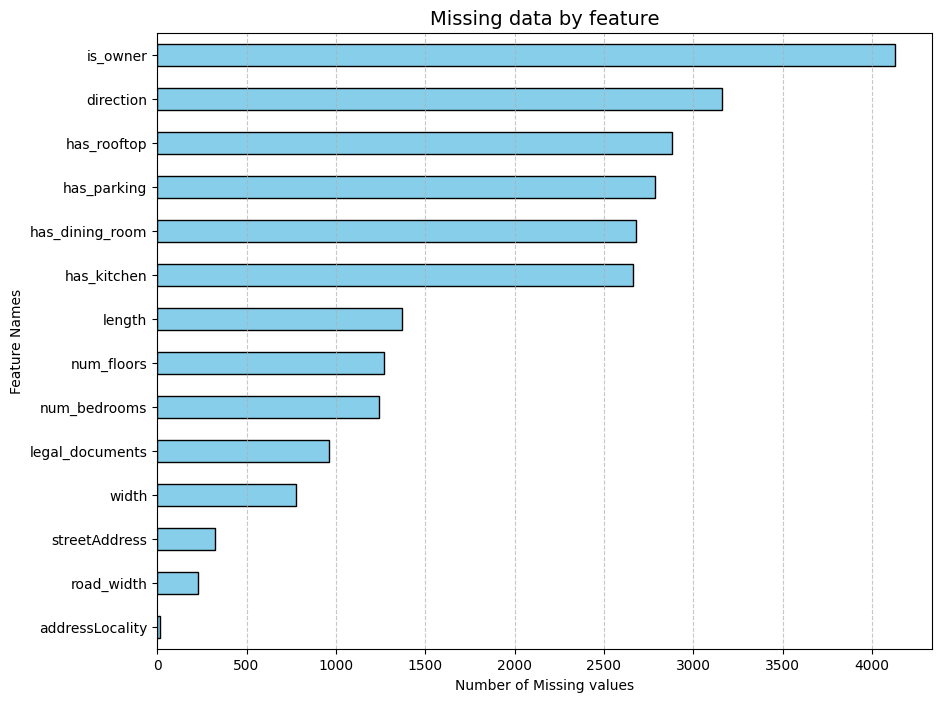

In [11]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing.plot.barh(color="skyblue", edgecolor="black")
plt.title("Missing data by feature", fontsize=14)
plt.xlabel("Number of Missing values")
plt.ylabel("Feature Names")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

Biểu đổ ma trận tương quan thể hiện mức độ tương quan giữa các biến số trong tập dữ liệu:
- Tông xanh thể hiện tương quan âm
- Tông đỏ thể hiện tưởng quan dương

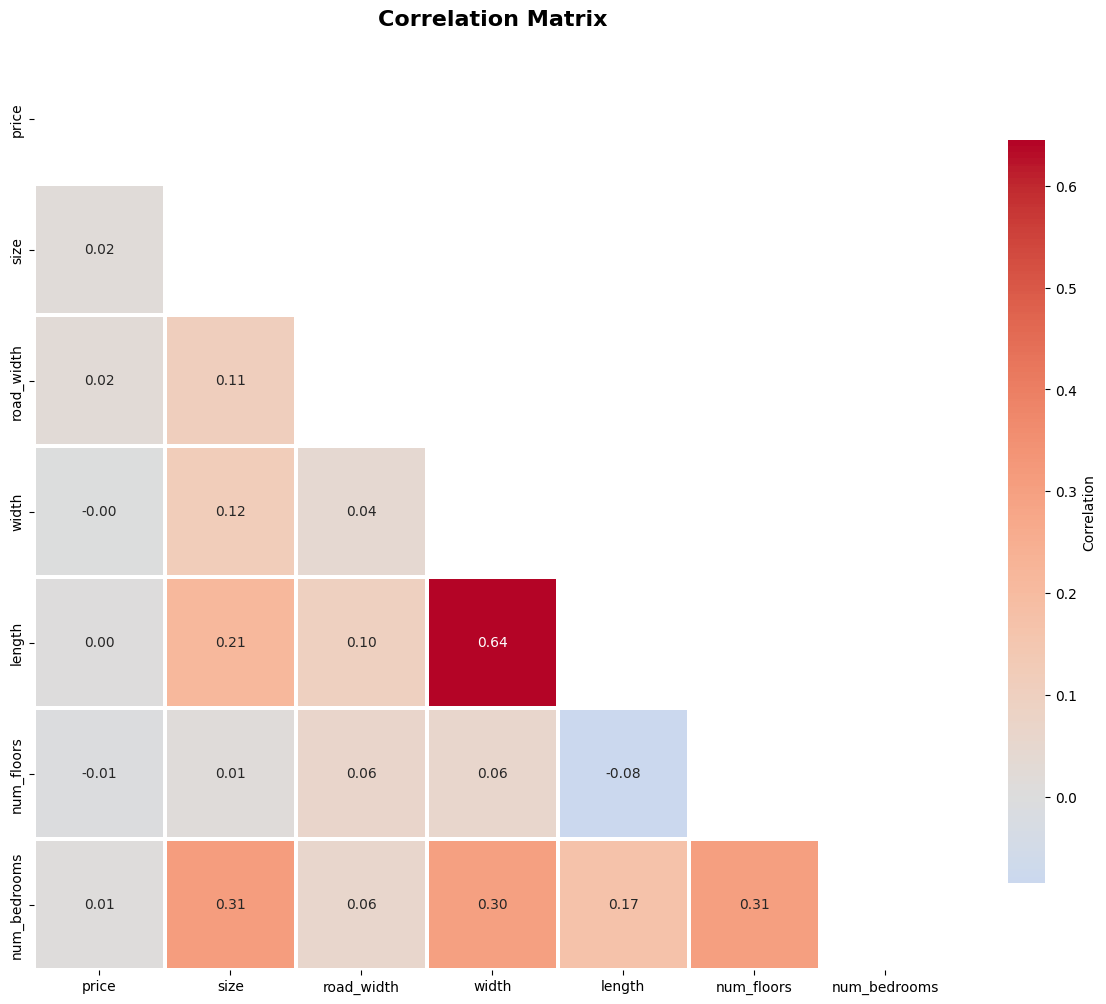

In [12]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
           cmap='coolwarm', center=0, square=True, linewidths=1.5,
           cbar_kws={"shrink": 0.8, "label": "Correlation"})
plt.title('Correlation Matrix',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [13]:
corr_feature_2price = data.corr(numeric_only=True)['price'].sort_values(ascending=False)[1:]
corr_feature_2price

road_width      0.022357
size            0.015530
num_bedrooms    0.009826
length          0.001725
width          -0.003817
num_floors     -0.006978
Name: price, dtype: float64

Tạo ra cột đặnc trưng giá nhà / diện tích để dễ trực quan dữ liệu

In [14]:
data['price_per_unit'] = data['price'] / data['size']
data['price_per_unit'].head()

0     5.250000
1    70.945946
2    85.000000
3    82.251082
4     5.416667
Name: price_per_unit, dtype: float64

plot biểu đồ histogram và box

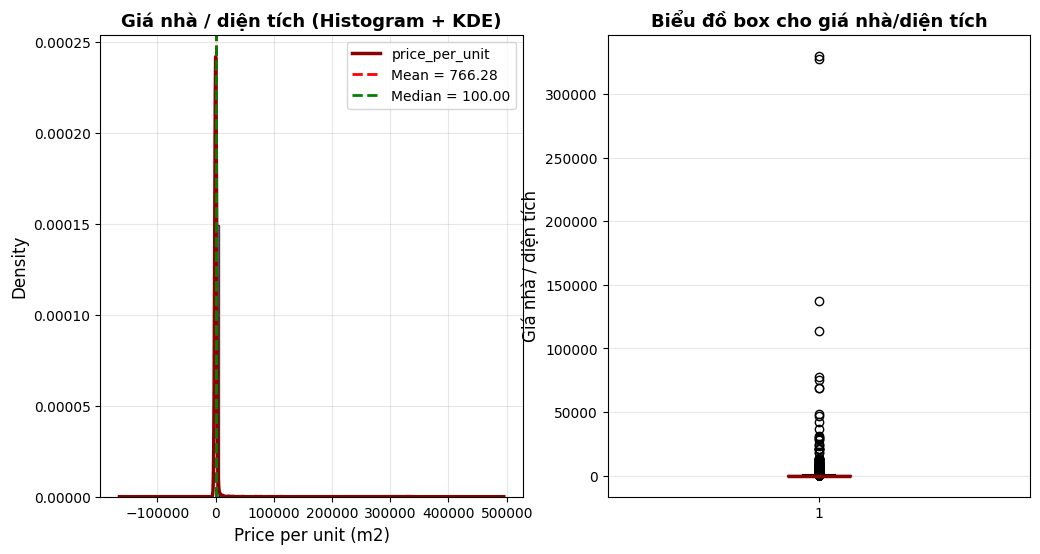

In [15]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(data['price_per_unit'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price_per_unit'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(data['price_per_unit'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data['price_per_unit'].mean():.2f}')
axes[0].axvline(data['price_per_unit'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data['price_per_unit'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Giá nhà / diện tích (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Boxplot
bp = axes[1].boxplot(data['price_per_unit'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



Biểu đồ box plot cho toàn bộ numberic feature

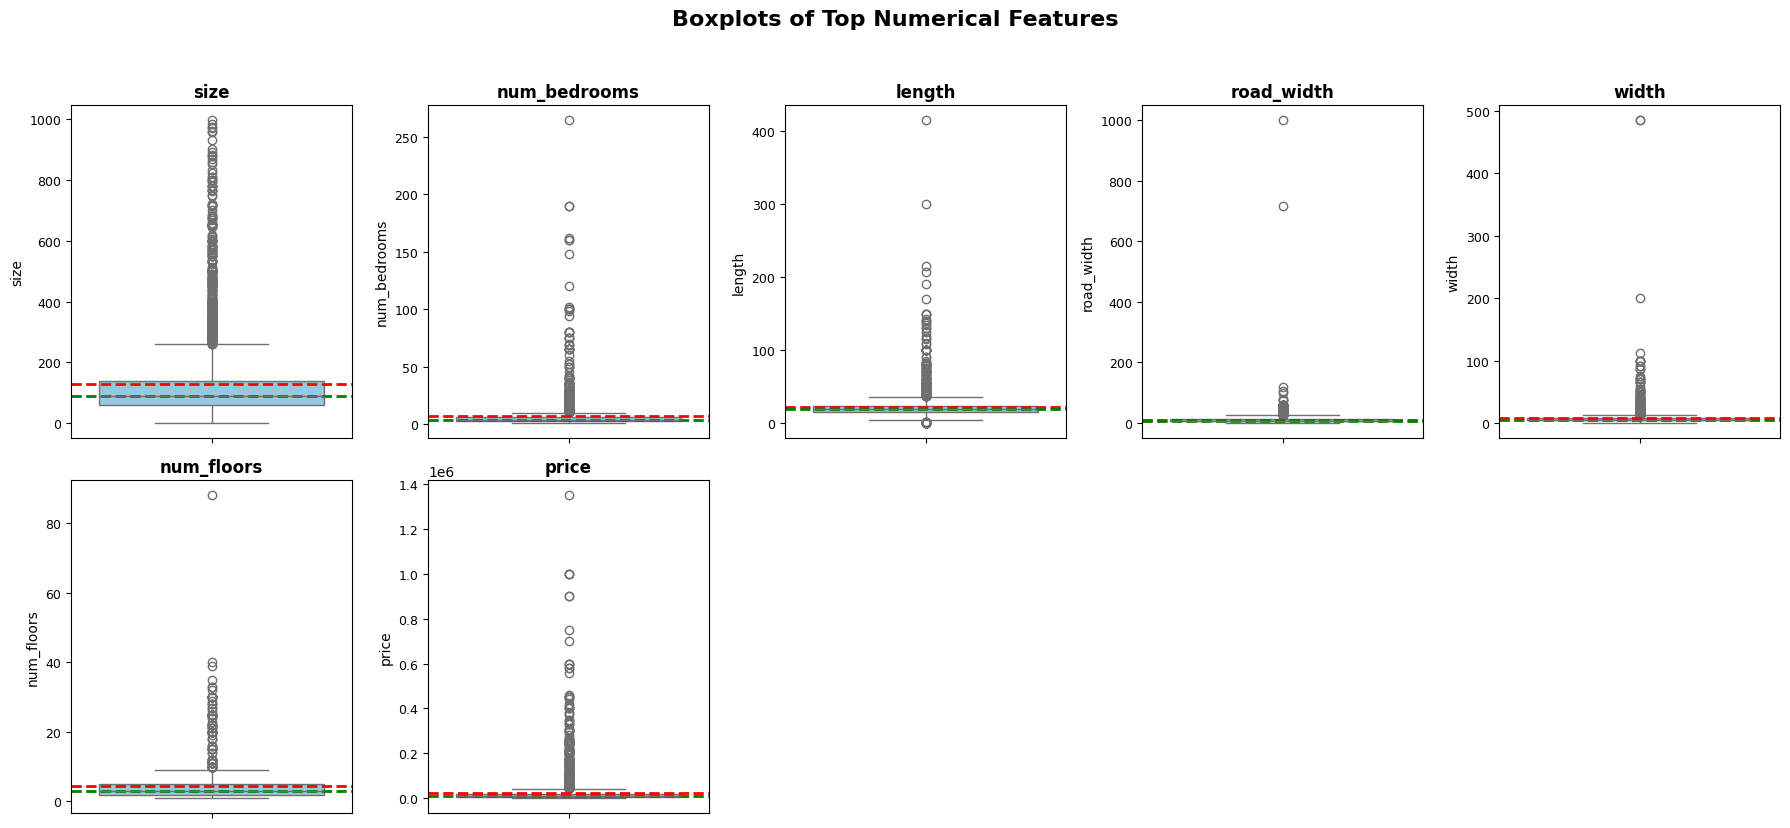

In [16]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=data, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()



SCATTER PLOTS: FEATURES vs PRICE


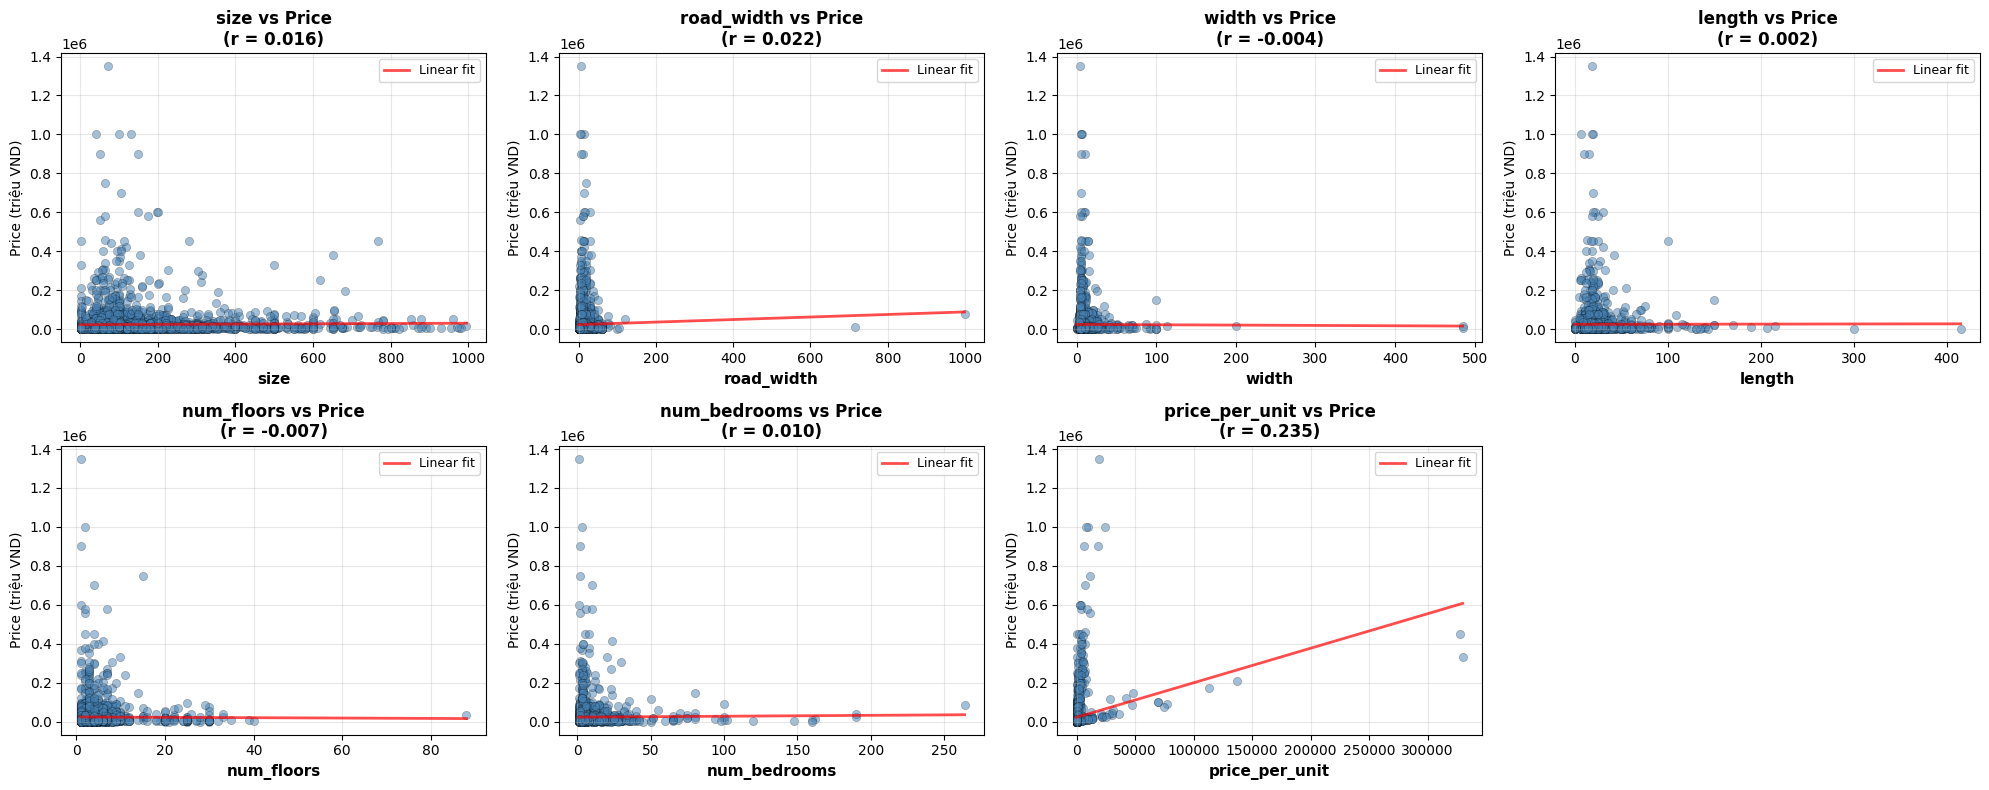

In [17]:
print("\n" + "=" * 80)
print("SCATTER PLOTS: FEATURES vs PRICE")
print("=" * 80)

# Lấy tất cả các cột trừ cột target 'price'
features = list(data.drop('price', axis=1).columns)

# Lọc ra chỉ các cột số để vẽ scatter plot
numeric_features = [feat for feat in features if pd.api.types.is_numeric_dtype(data[feat])]

# Tính toán số hàng và cột cho subplot
num_features = len(numeric_features)
num_cols = 4  # Số cột tối đa cho biểu đồ
num_rows = (num_features + num_cols - 1) // num_cols # Đảm bảo đủ hàng

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()

for idx, feat in enumerate(numeric_features):
    # Scatter plot
    axes[idx].scatter(data[feat], data['price'], alpha=0.5, s=35,
                     color='steelblue', edgecolor='k', linewidth=0.3)

    # Thêm regression line (linear) - chỉ khi có đủ phương sai và dữ liệu
    # Lọc bỏ NaN cho việc tính toán polyfit
    temp_data = data[[feat, 'price']].dropna()
    if len(temp_data) > 1 and temp_data[feat].nunique() > 1: 
        z = np.polyfit(temp_data[feat], temp_data['price'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(temp_data[feat].min(), temp_data[feat].max(), 100)
        axes[idx].plot(x_line, p(x_line), 'r-', linewidth=2, alpha=0.7, label='Linear fit')

    # Correlation
    corr = data[feat].corr(data['price'])

    # Labels và title
    axes[idx].set_xlabel(feat, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Price (triệu VND)', fontsize=10)
    axes[idx].set_title(f'{feat} vs Price\n(r = {corr:.3f})',
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(alpha=0.3)

# Ẩn các subplot không sử dụng nếu có
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Với boxplot, ta nhận định:
- Với diện tích, diện tích hộp nằm ở vị trí rất thấp và các giá trị cực đoan có thể kéo dài lên tận 1000 m2, với bối cảnh ở việt nam thì 300m2 đã là rất lớn, thường dành cho biệt thự hoặc nhà phố có quy mô lớn
- Cột giá nhà cho thấy phân phối rất lệch, phần lớn giá tập trungở mức thấp, nhà bình thường hiếm khi có giá cao và các giá cao hầu như đại diện cho bất động sản ở vị trí kim cương hoặc dinh thự, điều này không hợp lý với dự đoán giá nhà thông thường 
- Các giá trị ở các cột chiều dài, rộng, chiều rộng đường cũng có khá nhiều giá trị ngoại lai, khi các outlier kéo rất dài và có thể là các lô đất nông nghiệp thương mại rất lớn, không phù hợp cho bài toán dự đoán giá nhà dân dụng

# 3. Tiền xử lý dữ liệu

In [18]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler


import matplotlib.pyplot as plt
import seaborn as sns

Chuẩn hóa cột giá trị bool về nhị phân thay vì yes, no

In [19]:
def bool_to_num(sample):
    if sample == 'yes':
        return 1


cols_bool = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
for col in cols_bool:
    data[col] = data[col].apply(bool_to_num)

data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner,price_per_unit
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,1.0,1.0,1.0,1.0,NaN,5.250000
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,70.945946
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,85.000000
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,82.251082
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,5.416667


Drop cột bị thiếu quá nhiều giá trị: 
- is_owner: Bị thiếu quá 95%
- direction: Bị thiếu quá 70%

In [20]:
data = data.drop(['is_owner', 'direction'], axis=1)

**Vì đã thử rất nhiều phương pháp, nên thử drop tất cả cột na xem mô hình khá hơn không**

In [21]:
# na_col = ['streetAddress', 'addressLocality', 'addressRegion', 'road_width', 'width', 'length', 'num_floors', 'num_bedrooms']
# data = data.dropna(subset=na_col)

### Xem mô tả, tiền xử lý theo rule-base cho toàn toàn bộ data (vì chứa rất nhiều dữ liệu bẩn)

In [22]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,price_per_unit
count,4.183000e+03,4183.000000,3956.000000,3408.000000,2814.000000,2916.000000,2939.000000,1502.0,1518.0,1302.0,1399.0,4183.000000
mean,2.347060e+04,127.683991,11.356269,7.936514,21.492703,4.360768,6.689690,1.0,1.0,1.0,1.0,766.284562
std,6.260778e+04,125.586594,21.665472,14.456001,17.941867,4.423021,12.596435,0.0,0.0,0.0,0.0,8302.960254
min,1.500000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,0.010345
25%,4.500000e+03,60.000000,5.000000,4.500000,15.000000,2.000000,3.000000,1.0,1.0,1.0,1.0,40.384615
50%,9.250000e+03,90.000000,7.500000,5.000000,19.000000,3.000000,4.000000,1.0,1.0,1.0,1.0,100.000000
75%,1.950000e+04,140.000000,13.000000,8.000000,23.500000,5.000000,6.000000,1.0,1.0,1.0,1.0,242.539683
max,1.350000e+06,995.000000,999.000000,485.000000,415.000000,88.000000,264.000000,1.0,1.0,1.0,1.0,330000.000000


Về giá nhà/m2: Do phát hiện có ngoại lai RẤT LỚN là, tức 1000 tỷ/m2, hay các giá trị như 0.01 triệu/m2, nên giá trị này rất vô lý, có khẳ năng là lỗi nhập liệu
- Nên sẽ  tiến hành loại bỏ lỗi outlier CỰC ĐOAN
- Giá nhà trung bình ở việt nam thấp nhất là khoảng 16-25 triệu/m2
- Giá các căn nhà cao cấp ở việt nam cao nhất cùng lắm 1 tỷ/m2 hiện tại 

Theo điều 27 nghị định 100/2024/NĐ-CP có ghi rõ, nhà đất như nhà chung cư phải đáp ưng đủ tối thiếu là 25m2 để đảm bảo quy hoạch xây dựng co cơ quan nhà nước có thẩm quyền phê duyệt (Nguồn: https://luatvietnam.vn/dat-dai-nha-o/nha-o-xa-hoi-567-30110-article.html)
- Về cột kích thước, ta có thể thấy có bài đăng có kích thước rất bé là 1 m2, điều này là bất hợp lý vì diện tích bé nhất (nhà ở xã hội) do luật đất đai quy định cũng bé ít nhất là 25m2, mà size quá lớn cũng không phù hợp để dự đoán nhà vì khả năng là đấtđất
- Về số tầng, Số tầng nhà cao nhất  VN cũng chỉ ~81 tầng (Landmark 81), nhưng bài dự đoán cho nhà bình thường, không phải chung cư hoặc nhà cao cấp nên bình thường gía trị sẽ ở khoảng 7 - 10 tầng
- Về số phòng ngủ, các nhà bình thường cùng lắm chỉ có 12 phòng ngủ là nhiều
- Về chiều dài rộng, có những trường hợp nhập vào chiều dài hoặc rộng hoặc cả 2 đều bằng 0
- Về loại bất động sản, có rất nhiều loại bất động sản như đất, khu công nghệp, trung tâm thương mại,... bị trộn lẫn vào giá trị dự đoán


In [23]:
def rule_base_preprocess(data):
    data = data.copy()
    # Loại bỏ dữ liệu có giá nhà/unit quá cao, nghi do lỗi nhập liệu
    data = data[(data['price_per_unit'] > 16) & (data['price_per_unit'] < 1000)]
    # Theo quy định, ta có thể loại bỏ áp dụng cho toàn bộ nhà đất
    data = data[data['size'] >= 25]
    # Thử loại bỏ các sample có kích thước quá lớn
    data = data[data['size'] <= 200]
    # Giá trị đường trước nhà, kể cả đại lộ thì tối đa chỉ có thể rơi vào khoảng 30-50m hoặc cũng có khi đến 60-80m theo quy hoạch, nên ta sẽ xử lý phần này
    data = data[data['road_width'] < 80]
    # Trong thực tế, rất khó có nhà có số ngủ quá lớn mà chỉ giới hạn nhiều nhất khoảng 10 - 12 phòng ngủ, nếu trên có khả năng là nhà quá to hoặc chung cư
    data = data[data['num_bedrooms'] <= 12]
    # Các nhà biệt thự cùng lắm cũng chỉ 7 - 10 tầng, nếu cao hơn cũng có khả năng nhưng chủ yếu là các tòa nhà chung cư lớn
    data = data[data['num_floors'] < 10]
    # Dựa vào mô tả data.describe, thấy có 1 số cột như length có giá trị = 0, nên ta phải xử lý
    data = data[data['length'] > 0]
    data = data[data['width'] > 0]
    # Chỉ lấy loại bất động sản liên quan đến nhà
    data = data[data['property_type'].isin(['Nhà mặt tiền', 'Nhà trong hẻm', 'Biệt thự, nhà liền kề'])]

    data = data.drop(['price_per_unit'], axis=1)

    return data

In [24]:
data = rule_base_preprocess(data)

### Tách riêng 2 tập train/test và nhãn

In [25]:
train_df, test_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [26]:
train_df.head()

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2896,11000.0,30.0,Đường Tân Mỹ,Phường Tân Thuận,Hồ Chí Minh,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,8.0,2.0,2.0,NaN,NaN,NaN,NaN
2411,12500.0,192.0,Đường Hoàng Sa,Phường Nhiêu Lộc,Hồ Chí Minh,40.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,24.0,8.0,2.0,5.0,NaN,NaN,NaN,NaN
2713,3300.0,108.0,Đường Huỳnh Thị Hai,Phường Trung Mỹ Tây,Hồ Chí Minh,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,27.0,4.0,6.0,1.0,1.0,1.0,1.0
2175,2850.0,65.0,Đường Ngọc Thụy,Phường Bồ Đề,Hà Nội,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.5,15.0,5.0,4.0,1.0,1.0,1.0,1.0
2745,4650.0,83.0,Đường Hà Huy Tập,Phường Thanh Khê,Đà Nẵng,10.0,Nhà mặt tiền,NaN,5.0,16.6,3.0,4.0,NaN,NaN,NaN,NaN


In [27]:
test_df.head()

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2502,23000.0,31.0,Đường Trường Chinh,Phường Đống Đa,Hà Nội,2.4,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,6.000,5.0,5.0,1.0,1.0,1.0,NaN
1957,22400.0,39.0,Phố Đội cấn,Phường Ngọc Hà,Hà Nội,3.0,Nhà trong hẻm,NaN,4.8,8.125,7.0,4.0,1.0,1.0,1.0,NaN
1870,1650.0,90.0,Đường Mỹ An 23,Phường Ngũ Hành Sơn,Đà Nẵng,5.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.5,20.000,1.0,3.0,NaN,NaN,NaN,NaN
408,11500.0,55.0,Đường Bạch Đằng,Phường Tân Sơn Hòa,Hồ Chí Minh,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,11.000,2.0,2.0,NaN,NaN,NaN,NaN
576,4150.0,59.0,Đường Ông Ích Khiêm,Phường Hải Châu,Đà Nẵng,4.5,Nhà trong hẻm,NaN,4.8,12.200,4.0,5.0,NaN,NaN,NaN,NaN


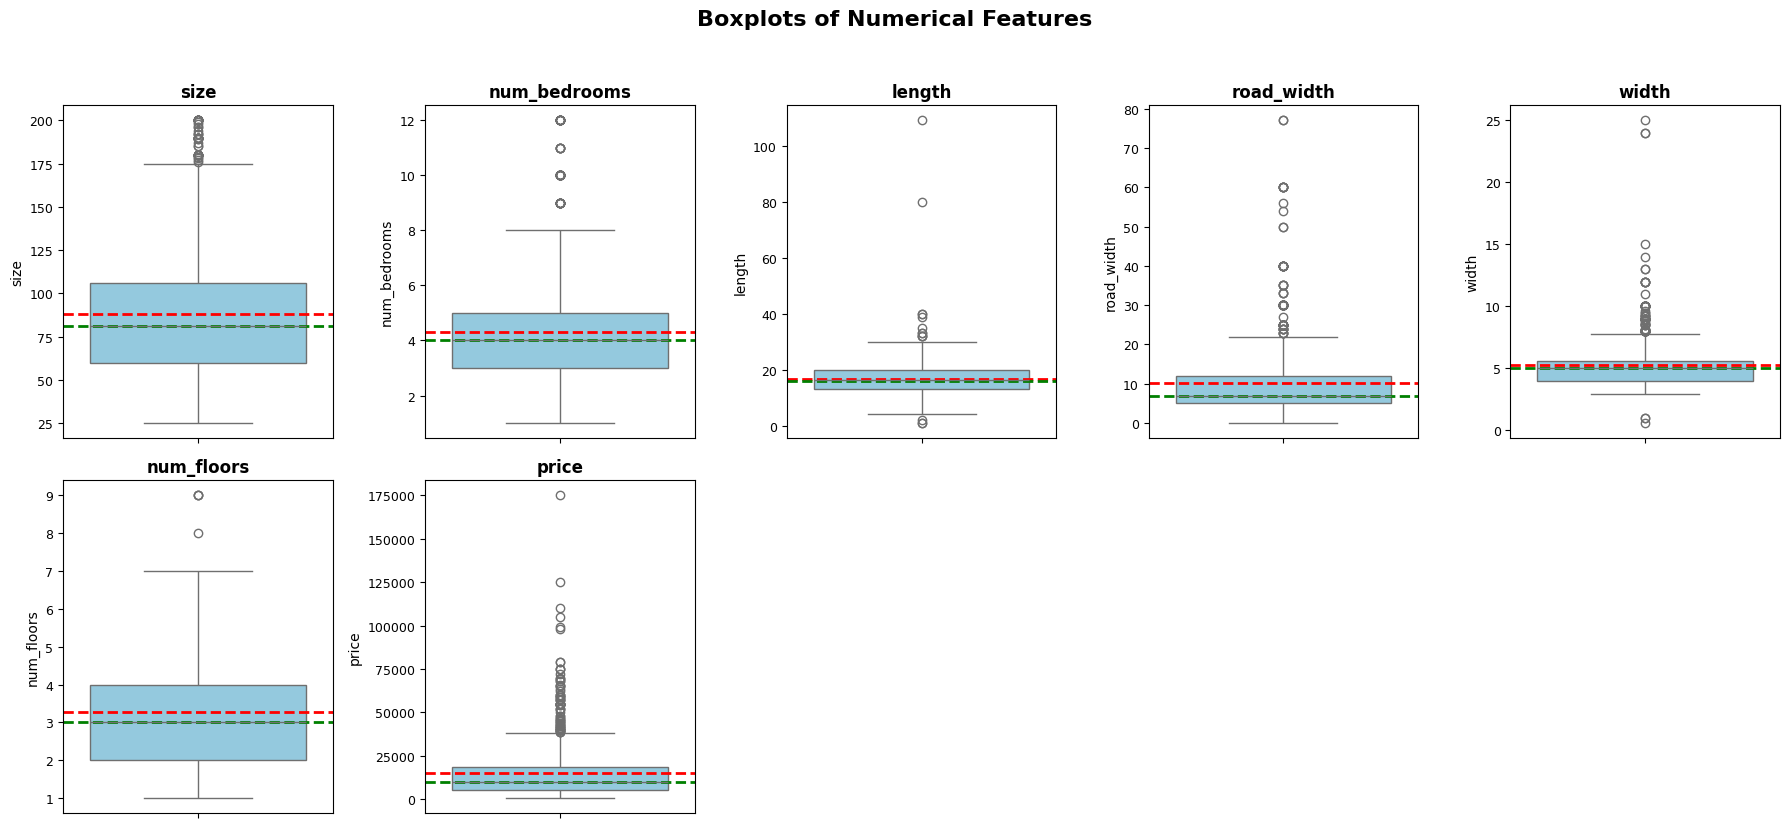

In [28]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()


#### Xử lý dữ liệu ngoại lai bằng phương pháp IQR

Sau khi plot biểu đồ box, ta có thể thấy dễ dàng các cột feature numberic đang có rất nhiều dữ liệu ngoại lai, bao gồm cả gột target, điều này có 2 ý nghĩa:
- Nếu dữ liệu là thật, 1 số điểm dữ liệu outlier có thể giúp mô hình khái quát tốt hơn với các trường hợp giá nhà cao cấp và dự đoán tốt hơn nếu trong tương lai gặp
- Hoặc ngược lại, các outlier là lỗi nhập liệu, dữ liệu giả chỉ nhập vào mà nếu mua người mau sẽ liên hệ trực tiếp qua người bán và giả thuyết cũng đang thiên về
  - Ví dụ: Giá nhà 999tỷ, mô tả có ghi liên hệ với người bán (chỉ là ví dụ cho những trường hợp có liên quan)

<br>

Nên ta sẽ sử lý outlier với các cột ['price']

In [29]:
def remove_outlier_with_IQR(train_df, test_df, col_names, LowerFence, UpperFence):
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    for col_idx, col in enumerate(col_names):
        # Fit trên tập train 
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - LowerFence * IQR
        upper_bound = Q3 + UpperFence * IQR 

        # Transform cho cả train và test
        train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
        test_df = test_df[(test_df[col] >= lower_bound) & (test_df[col] <= upper_bound)]

    return train_df, test_df

In [30]:
col_have_outlier = ['price', 'size', 'num_bedrooms', 'road_width', 'width']

In [31]:
train_df, test_df = remove_outlier_with_IQR(train_df, test_df, col_names=col_have_outlier, LowerFence=1.5, UpperFence=1.5)
train_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2896,11000.0,30.0,Đường Tân Mỹ,Phường Tân Thuận,Hồ Chí Minh,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,8.0,2.0,2.0,NaN,NaN,NaN,NaN
2713,3300.0,108.0,Đường Huỳnh Thị Hai,Phường Trung Mỹ Tây,Hồ Chí Minh,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,27.0,4.0,6.0,1.0,1.0,1.0,1.0
2175,2850.0,65.0,Đường Ngọc Thụy,Phường Bồ Đề,Hà Nội,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.5,15.0,5.0,4.0,1.0,1.0,1.0,1.0
2745,4650.0,83.0,Đường Hà Huy Tập,Phường Thanh Khê,Đà Nẵng,10.0,Nhà mặt tiền,NaN,5.0,16.6,3.0,4.0,NaN,NaN,NaN,NaN
2273,11000.0,73.0,Đường Hồ Hảo Hớn,Phường Cầu Ông Lãnh,Hồ Chí Minh,5.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.2,17.5,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,31000.0,132.0,Đường Phạm Thế Hiển,Phường Vũng Tàu,Hồ Chí Minh,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,26.0,1.0,1.0,NaN,NaN,NaN,NaN
3675,1800.0,60.0,Đường Võ Văn hát,Phường Long Trường,Hồ Chí Minh,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,15.0,2.0,5.0,NaN,NaN,NaN,NaN
3786,7100.0,75.0,Đường Trần Đăng Ninh,Phường Kiến Hưng,Hà Nội,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,6.5,12.0,4.0,5.0,NaN,NaN,NaN,NaN
2857,20000.0,122.0,Đường Lý Tự Trọng,Phường Quy Nhơn,Gia Lai,14.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,24.4,3.0,4.0,1.0,1.0,1.0,1.0


In [32]:
test_df

,price,size,streetAddress,addressLocality,addressRegion,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2502,23000.0,31.0,Đường Trường Chinh,Phường Đống Đa,Hà Nội,2.4,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,6.000,5.0,5.0,1.0,1.0,1.0,NaN
1957,22400.0,39.0,Phố Đội cấn,Phường Ngọc Hà,Hà Nội,3.0,Nhà trong hẻm,NaN,4.8,8.125,7.0,4.0,1.0,1.0,1.0,NaN
1870,1650.0,90.0,Đường Mỹ An 23,Phường Ngũ Hành Sơn,Đà Nẵng,5.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.5,20.000,1.0,3.0,NaN,NaN,NaN,NaN
408,11500.0,55.0,Đường Bạch Đằng,Phường Tân Sơn Hòa,Hồ Chí Minh,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,11.000,2.0,2.0,NaN,NaN,NaN,NaN
576,4150.0,59.0,Đường Ông Ích Khiêm,Phường Hải Châu,Đà Nẵng,4.5,Nhà trong hẻm,NaN,4.8,12.200,4.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,21000.0,48.0,Quốc Lộ 5,Phường Hồng Bàng,Hải Phòng,10.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,12.000,4.0,4.0,NaN,NaN,NaN,NaN
3162,9800.0,120.0,Đường Thăng Long,Phường Tân Sơn Nhất,Hồ Chí Minh,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.5,27.000,4.0,8.0,1.0,1.0,1.0,1.0
3095,11000.0,125.0,Đường Nguyễn Đình Chiểu,Phường Buôn Ma Thuột,Đắk Lắk,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,25.000,4.0,7.0,1.0,1.0,1.0,1.0
1187,3600.0,112.0,Đường Nguyễn Ảnh Thủ,Phường Tân Thới Hiệp,Hồ Chí Minh,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,25.000,3.0,4.0,NaN,NaN,NaN,NaN


Hiển thị box để xem phân phối dữ liệu sau khi xử lý IQR

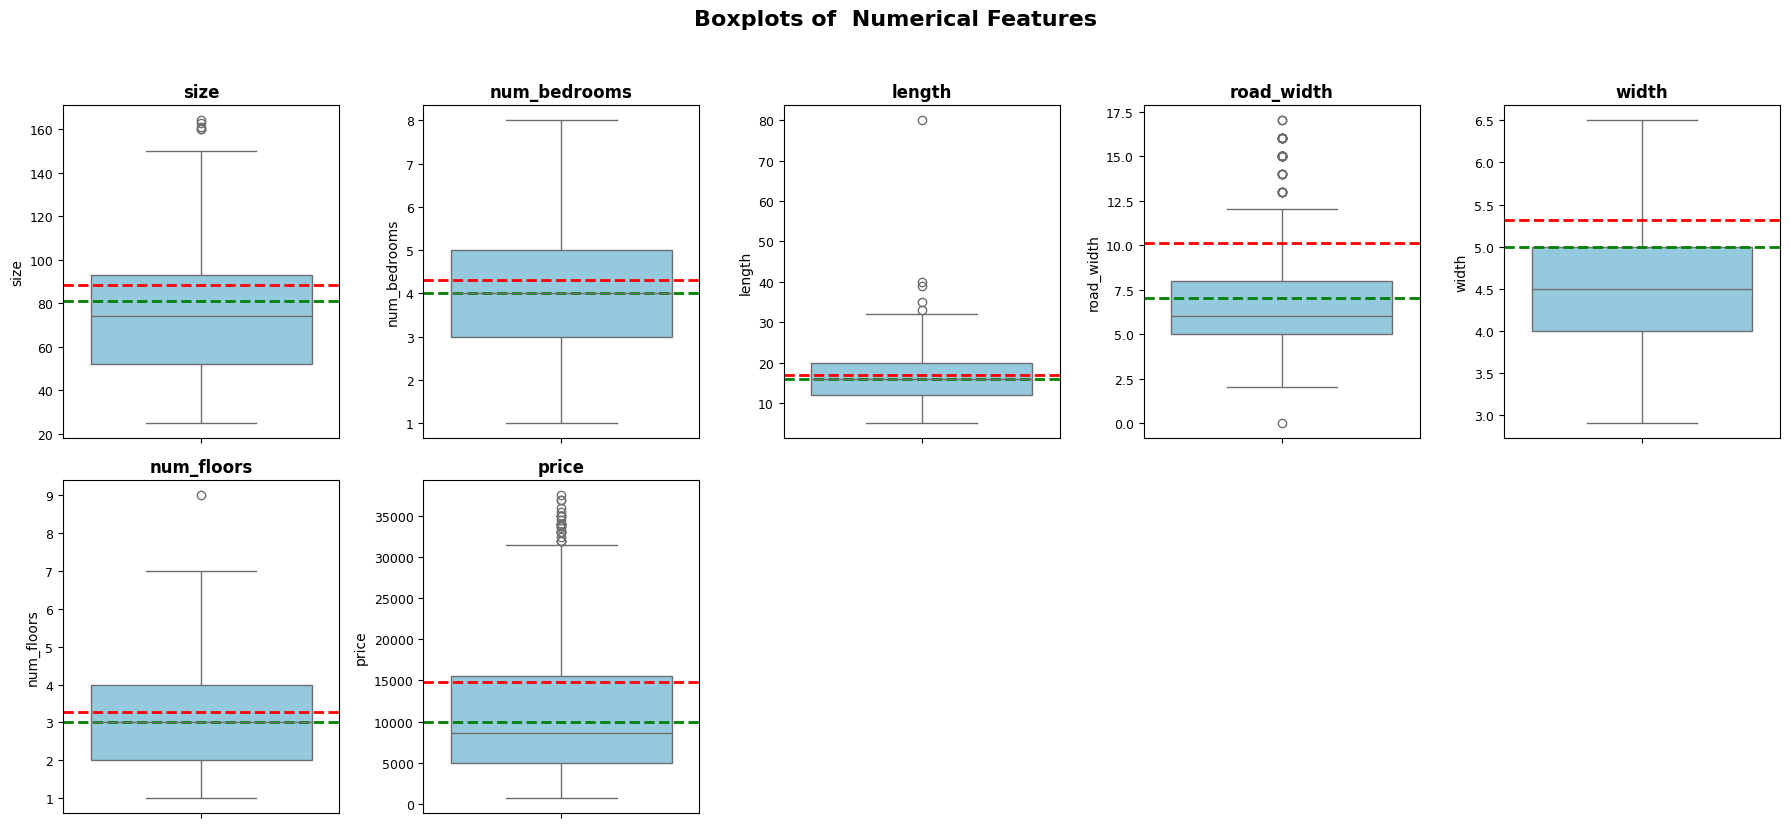

In [33]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of  Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()


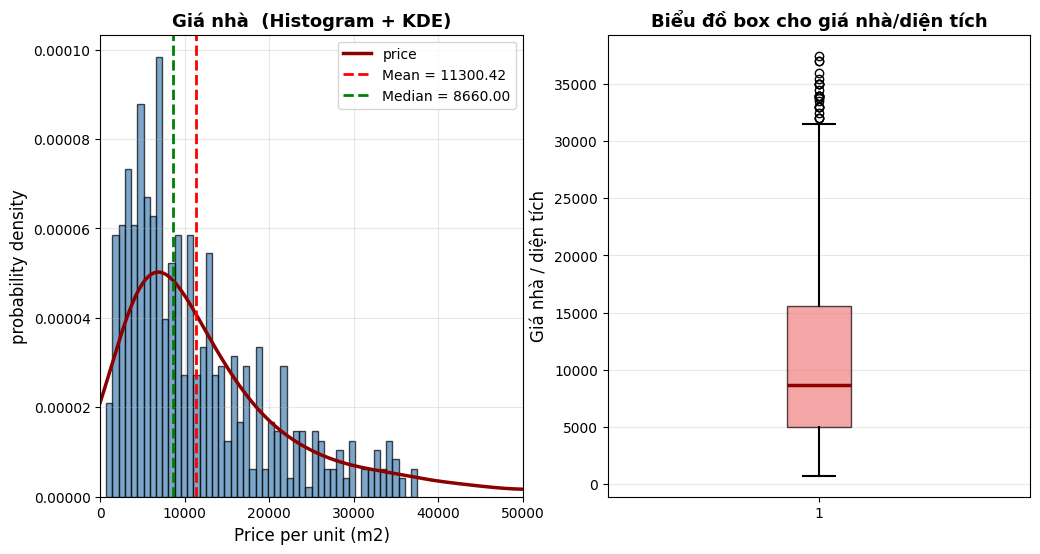

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(train_df['price'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(train_df['price'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {train_df['price'].mean():.2f}')
axes[0].axvline(train_df['price'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {train_df['price'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('probability density', fontsize=12)
axes[0].set_title('Giá nhà  (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
# Giới hạn vùng hiển thị trên cả hai biểu đồ để trực quan rõ hơn (ví dụ trong khoảng [0, 50000])
min_price, max_price = 0, 50000

axes[0].set_xlim(min_price, max_price)

# Boxplot
bp = axes[1].boxplot(train_df['price'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



#### Chuẩn hóa phân phối chuẩn graussin

Vì phân phối cột target luôn dương, tức giá nhà luôn dương và phân phối bị lệch sang trái là chủ yếu, ta thử chiến lược chuẩn hóa phân phối Box-Cox hoặc Yeo-Johnson

In [35]:
from sklearn.preprocessing import PowerTransformer

skewed = PowerTransformer(method='box-cox', standardize=False)

# Fit cho dữ liệu train và transform cho dữ liệu test
train_df['price'] = skewed.fit_transform(train_df['price'].values.reshape(-1, 1))
test_df['price'] = skewed.transform(test_df['price'].values.reshape(-1, 1))


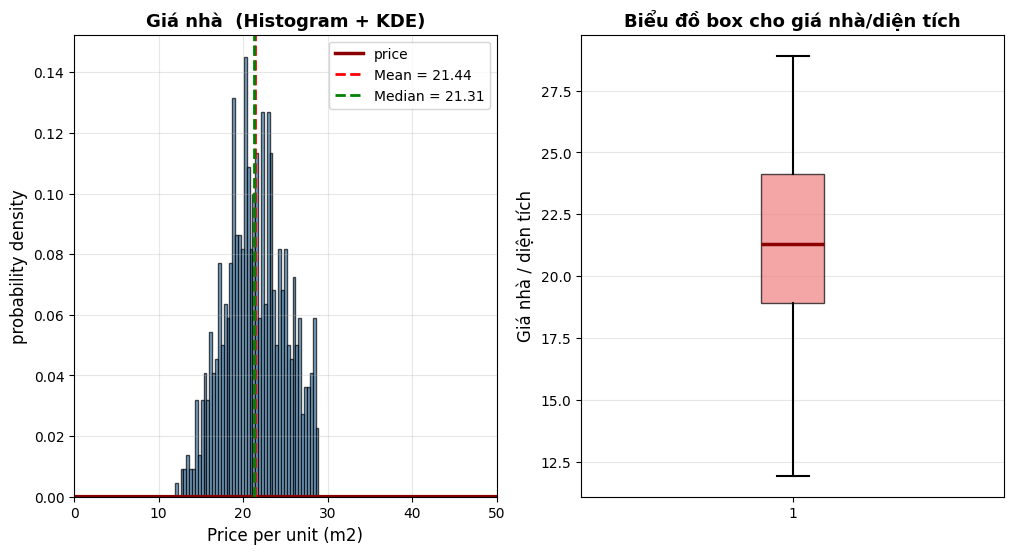

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(train_df['price'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(train_df['price'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {train_df['price'].mean():.2f}')
axes[0].axvline(train_df['price'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {train_df['price'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('probability density', fontsize=12)
axes[0].set_title('Giá nhà  (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
# Giới hạn vùng hiển thị trên cả hai biểu đồ để trực quan rõ hơn (ví dụ trong khoảng [0, 50000])
min_price, max_price = 0, 50

axes[0].set_xlim(min_price, max_price)

# Boxplot
bp = axes[1].boxplot(train_df['price'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



Drop các cột không không mang giá trị ý nghĩa:
- Sau khi check kỹ trên web được cào, 1 số bài đăng có cả nhà đầy đủ tiện nghi, nhưng lại không tích vào các ô như có bếp, gác, để xe nên tạm thời drop các cột này đi vì không mang giá trị dự đoán
- cột legal_docdocuments nhận thấy cột chỉ mang tính xem đất có giấy tờ không để bán, nên cũng không mang ý ýnghiax

In [37]:
# Thử drop các cột mang giá trị bool
bool_cols = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'legal_documents']
train_df = train_df.drop(bool_cols, axis=1)
test_df = test_df.drop(bool_cols, axis=1)

#### Fill missing value bằng các chiến lược cụ thể với từng feature

In [38]:
from sklearn.impute import SimpleImputer, KNNImputer

In [39]:
# Các category feature có ý nghĩa vị trí và tài liệu quan trọng, drop các cột không mang vị trí
loc_cols = ['streetAddress', 'addressLocality', 'addressRegion']
train_df = train_df.dropna(subset=loc_cols)
test_df = test_df.dropna(subset=loc_cols)


# Fillna các continue feature bằng chiến lược, ta sẽ thử impute giá tị thiếu bằng SimpleImputer hoặc KNNImputer
num_cols = ['road_width', 'width', 'length']
# Imputer_numberic = KNNImputer(n_neighbors=5)
# train_df[num_cols] = Imputer_numberic.fit_transform(train_df[num_cols])
# test_df[num_cols] = Imputer_numberic.transform(test_df[num_cols])
train_df = train_df.dropna(subset=num_cols)
test_df = test_df.dropna(subset=num_cols)


# Fillna các feature dạng số tầng, số phòng ngủ, ta sẽ thử fillna bằng chiến lược mode
floor_cols = ['num_floors', 'num_bedrooms']
Imputer_mode = SimpleImputer(strategy='most_frequent')
train_df[floor_cols] = Imputer_mode.fit_transform(train_df[floor_cols])
test_df[floor_cols] = Imputer_mode.transform(test_df[floor_cols])

train_df = train_df.dropna(subset=['price'])
test_df = test_df.dropna(subset=['price'])


Téch riêng nhãn và data riêng

In [40]:

X_train = train_df.drop(['price'], axis=1)
X_test = test_df.drop(['price'], axis=1)

y_train = train_df['price'].values 
y_test = test_df['price'].values 



In [41]:
print(len(X_train))
print(len(X_test))

639
161


feature engineering - tạo cột mới

In [42]:
# Tạo thêm các feature mới cho cả train và test
for df in [X_train, X_test]:
    df['arena'] = df['width'] * df['length']
    df['shape_ratio'] = df['width'] / df['length']
    df['total_floor_area'] = df['size'] * df['num_floors']

Lọc ra các category quan trọng để giữ lại, còn lại cho vào "Other" để tránh curse of dimention

In [43]:
# def reduce_categories(data, col, threshold=100):
#     """Giữ lại top N categories, gộp còn lại thành 'Other'"""
#     value_counts = data[col].value_counts()
#     top_categories = value_counts.head(threshold).index
#     data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')
#     return data

# # Áp dụng trước khi One-Hot Encoding
# for col in ['streetAddress', 'addressLocality', 'addressRegion']:
#     data = reduce_categories(data, col, threshold=50)  # Chỉ giữ 50 giá trị phổ biến nhất

In [44]:
X_train_og = X_train.copy()
X_test_og = X_test.copy()

In [45]:
# X_train = X_train.drop(['streetAddress'], axis=1)
# X_test = X_test.drop(['streetAddress'], axis=1)

Mã hóa 1hot-encoder với các feature dạng categorical

In [46]:
# # cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'property_type', 'legal_documents']
# cat_cols = ['property_type']
# OneHot = OneHotEncoder(
#     handle_unknown="ignore",
#     sparse_output=False
# )
# OneHot.fit(X_train[cat_cols])

# OneHot_cols = list(OneHot.get_feature_names_out(cat_cols))

# X_train[OneHot_cols] = OneHot.transform(X_train[cat_cols])
# X_test[OneHot_cols] = OneHot.transform(X_test[cat_cols])

# X_train = X_train.drop(cat_cols, axis=1)
# X_test = X_test.drop(cat_cols, axis=1)

# X_train_encode = X_train.copy()
# X_test_encode = X_test.copy()


thử encode categories feature bầng target encoder, với mục tiêu encode thành 1 cột qua mean label để tránh curse of dimension

In [47]:
# from category_encoders import TargetEncoder

# cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']
# target_encoder = TargetEncoder(cols=cat_cols)
# X_train_encoded = target_encoder.fit_transform(X_train[cat_cols], y_train)
# X_test_encoded = target_encoder.transform(X_test[cat_cols])

# X_train = X_train.drop(cat_cols, axis=1)
# X_train = pd.concat([X_train, X_train_encoded], axis=1)

# X_test = X_test.drop(cat_cols, axis=1)
# X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [48]:
from category_encoders import CatBoostEncoder

# Chọn các cột categorical để encode
catboost_cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'property_type']

# Khởi tạo encoder
catboost_encoder = CatBoostEncoder(cols=catboost_cat_cols, return_df=True)

# Fit và transform trên tập train, transform trên tập test
X_train[catboost_cat_cols] = catboost_encoder.fit_transform(X_train[catboost_cat_cols], y_train)
X_test[catboost_cat_cols] = catboost_encoder.transform(X_test[catboost_cat_cols])

X_train_encode = X_train.copy()
X_test_encode = X_test.copy()



Xem thử outlier của dữ liệu số tổng quan (trước khi tách train/test), để tìm chiến lược scaler phù hợp: std, robus hay loại bỏ qua IQR
- Ở đây được chọn robus scaler vì dữ liệu outlier có khả năng là nhà cao cấp

$$
x_{RobusScaler} = \frac{x - Q2}{Q3 - Q1}
$$

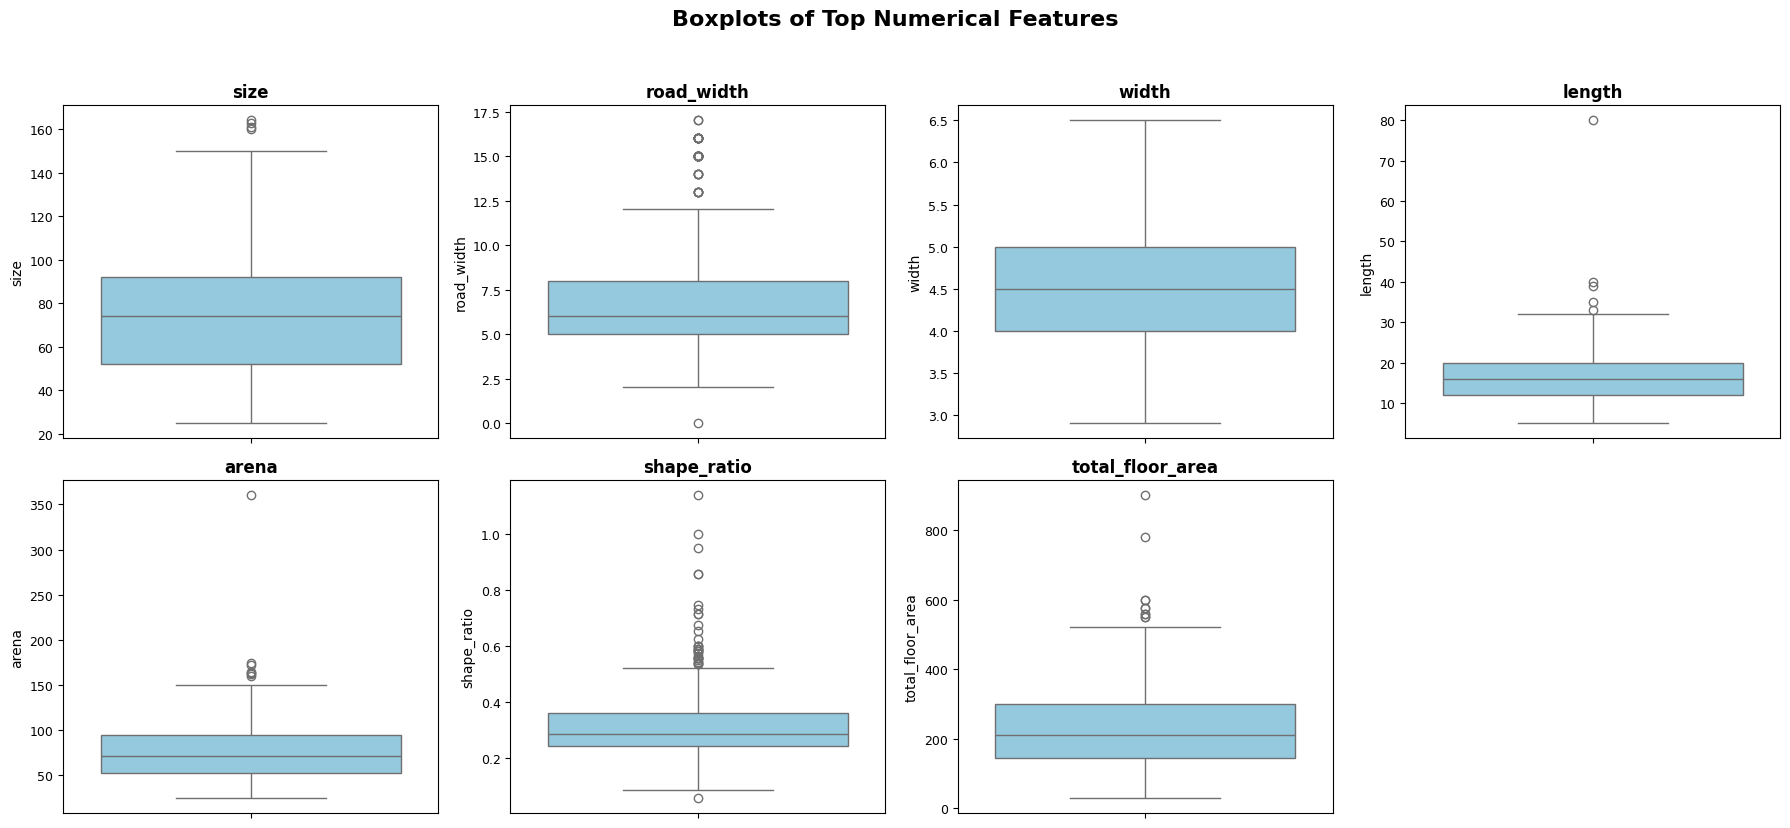

In [49]:
numberic_cols = ['size', 'road_width', 'width', 'length', 'arena', 'shape_ratio', 'total_floor_area']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numberic_cols):
    sns.boxplot(data=X_train, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(numberic_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top Numerical Features", fontsize=16, 
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()


SCATTER PLOTS: X_train NUMERIC FEATURES vs PRICE


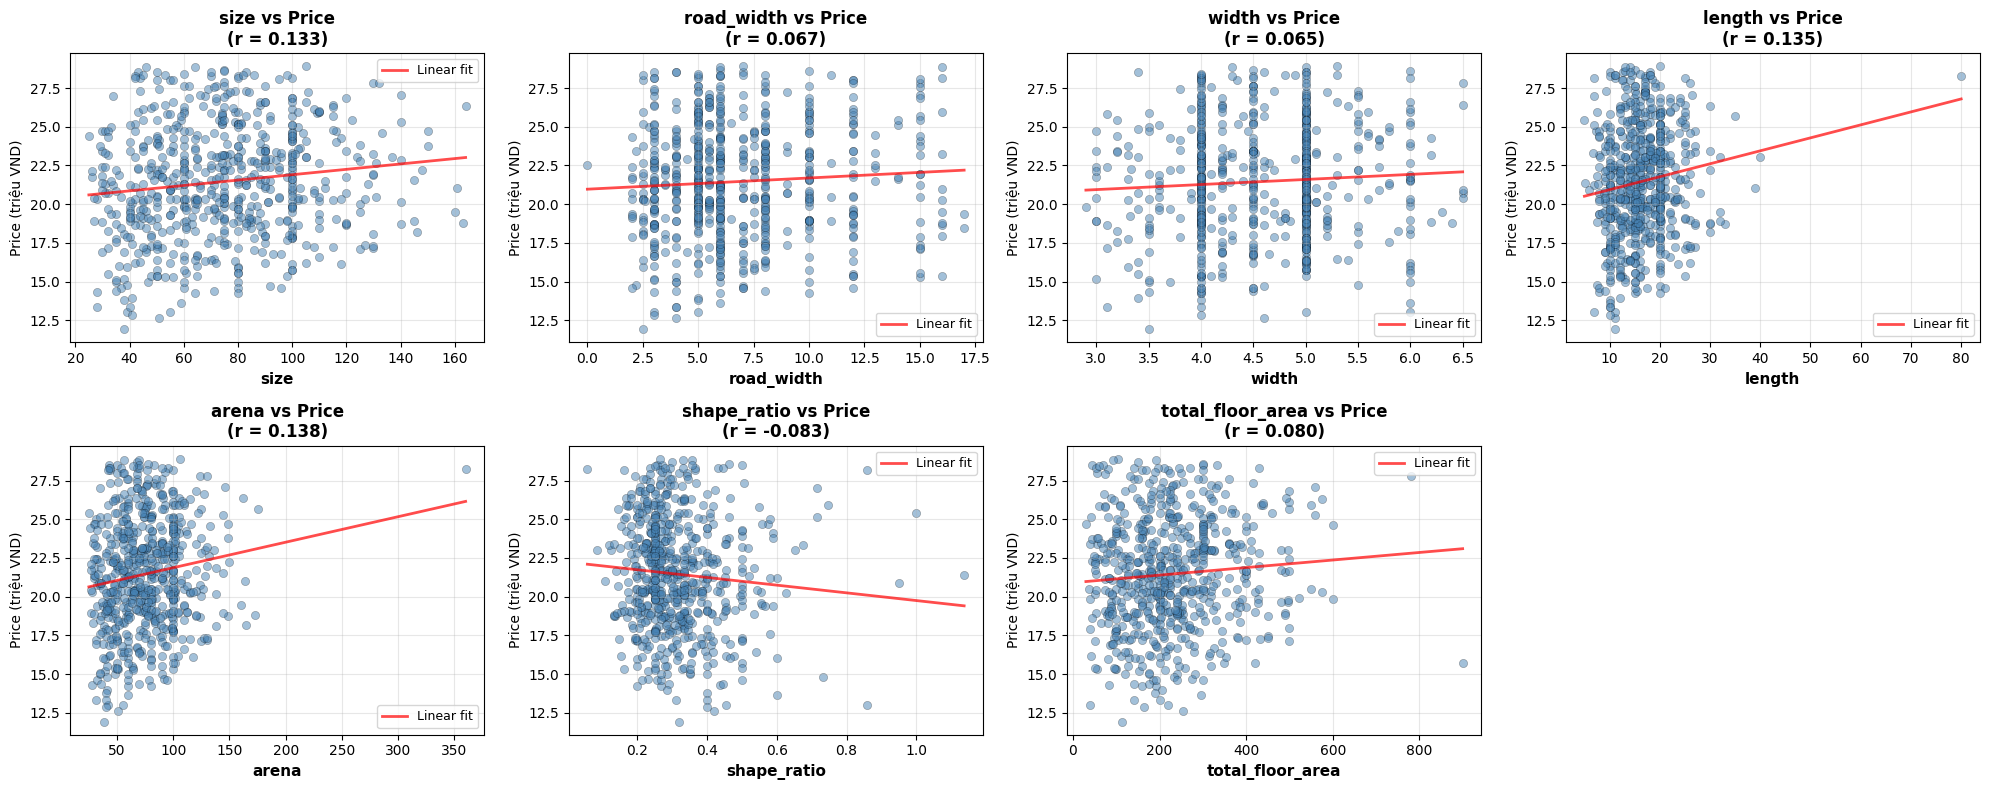

In [50]:
print("\n" + "=" * 80)
print("SCATTER PLOTS: X_train NUMERIC FEATURES vs PRICE")
print("=" * 80)

# Dùng numberic_cols được định nghĩa trước
numeric_features = numberic_cols

# Xác định số hàng và cột cho subplot
num_features = len(numeric_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()

for idx, feat in enumerate(numeric_features):
    # Plot scatter với price y_train
    axes[idx].scatter(X_train[feat], y_train, alpha=0.5, s=35,
                      color='steelblue', edgecolor='k', linewidth=0.3)

    # Thêm regression line (linear) - chỉ khi có đủ phương sai và dữ liệu
    temp_data = pd.DataFrame({feat: X_train[feat], 'price': y_train}).dropna()
    if len(temp_data) > 1 and temp_data[feat].nunique() > 1:
        z = np.polyfit(temp_data[feat], temp_data['price'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(temp_data[feat].min(), temp_data[feat].max(), 100)
        axes[idx].plot(x_line, p(x_line), 'r-', linewidth=2, alpha=0.7, label='Linear fit')

    # Correlation
    corr = temp_data[feat].corr(temp_data['price'])

    axes[idx].set_xlabel(feat, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Price (triệu VND)', fontsize=10)
    axes[idx].set_title(f'{feat} vs Price\n(r = {corr:.3f})',
                        fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(alpha=0.3)

# Ẩn các subplot không sử dụng nếu có
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [51]:
numberic_cols = ['size', 'road_width', 'width', 'length', 'arena', 'shape_ratio', 'total_floor_area']


NumbericScaler = RobustScaler()
NumbericScaler.fit(X_train[numberic_cols])

X_train[numberic_cols] = NumbericScaler.transform(X_train[numberic_cols])
X_test[numberic_cols] = NumbericScaler.transform(X_test[numberic_cols])


# 4. Huấn luyện mô hình sử dụng bộ dữu liệu đã được tiền xử lý trước đó, bộ dữ liệu gồm:
- 1 chỉ số numberic được giữ nguyên: ['num_floors']
- 4 chỉ số numberic được scaler qua chiến lược robus scaler: ['size', 'road_width', 'width', 'length']
- 5 chỉ số book : ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
- Các chỉ số category được 1hot encoder: ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']

In [52]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, minmax_scale
from sklearn.preprocessing import PolynomialFeatures
# Import các model
# simple model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Kiểm tra và lưu kết quả cross-validation cho các mô hình

from sklearn.model_selection import RepeatedKFold, cross_val_score

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),  
    "Lasso": Lasso(alpha=0.01), 
    "RandomForest": RandomForestRegressor(
        n_estimators=100,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=5,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        learning_rate=0.01,
        n_estimators=100,
        max_depth=5,
        subsample=0.8,
        random_state=42, 
        verbosity=0
    )

}

tree_based_models = ["RandomForest", "XGBoost", "LightGBM"] # có thể bổ sung thêm nếu cần

# Danh sách lưu trữ kết quả
results = {
    "Model": [],
    "Train_RMSE": [],
    "Test_RMSE": [],
    "Train_R2": [],
    "Test_R2": [],
    "CV_R2_Mean": [],
    "CV_R2_Std": []
}

# Cross-validation strategy
cv_strategy = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)

for name, model in models.items():
    # CatBoostRegressor: xử lý riêng với X_train_og và X_test_og
    if name == "CatBoostRegressor":
        cv_scores = cross_val_score(model, X_train_og, y_train, cv=cv_strategy, scoring='r2')
        cv_r2_mean = np.mean(cv_scores)
        cv_r2_std = np.std(cv_scores)
        regressor = model.fit(X_train_og, y_train)
        y_train_pred = regressor.predict(X_train_og)
        y_test_pred = regressor.predict(X_test_og)
    # Tree-based models (trừ CatBoost): dùng X_train_encode và X_test_encode
    elif name in tree_based_models:
        cv_scores = cross_val_score(model, X_train_encode, y_train, cv=cv_strategy, scoring='r2')
        cv_r2_mean = np.mean(cv_scores)
        cv_r2_std = np.std(cv_scores)
        regressor = model.fit(X_train_encode, y_train)
        y_train_pred = regressor.predict(X_train_encode)
        y_test_pred = regressor.predict(X_test_encode)
    # Các model tuyến tính: truyền vào X_train, X_test thường
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='r2')
        cv_r2_mean = np.mean(cv_scores)
        cv_r2_std = np.std(cv_scores)       
        regressor = model.fit(X_train, y_train)
        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        
    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Lưu kết quả
    results["Model"].append(name)
    results["Train_RMSE"].append(train_rmse)
    results["Test_RMSE"].append(test_rmse)
    results["Train_R2"].append(train_r2)
    results["Test_R2"].append(test_r2)
    results["CV_R2_Mean"].append(cv_r2_mean)
    results["CV_R2_Std"].append(cv_r2_std)

# Tổng hợp kết quả vào DataFrame
df_results = pd.DataFrame(results).sort_values(by='Test_R2', ascending=False)
df_results

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2,CV_R2_Mean,CV_R2_Std
4,XGBoost,3.127581,3.472322,0.254815,-0.021698,0.016378,0.026000
3,RandomForest,3.103031,3.515417,0.266468,-0.047216,0.006949,0.033093
2,Lasso,3.556132,3.544698,0.036609,-0.064734,-0.003056,0.027557
1,Ridge,3.554345,3.553252,0.037577,-0.069880,-0.016678,0.034761
0,LinearRegression,3.554289,3.555856,0.037607,-0.071448,-0.022506,0.040642


Thử poly feature cho các mô hình tuyến tính

In [54]:
numberic_cols = ['size', 'road_width', 'width', 'length', 'arena', 'shape_ratio', 'total_floor_area']

poly_features = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False
)

train_poly = poly_features.fit_transform(X_train[numberic_cols])
test_poly = poly_features.transform(X_test[numberic_cols])

X_train_poly = np.hstack([train_poly, X_train.drop(numberic_cols, axis=1).values])
X_test_poly = np.hstack([test_poly, X_test.drop(numberic_cols, axis=1).values])

In [55]:
# Tiến hành dự đoán cho model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Danh sách lưu trữ kết quả
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

# Huấn luyện và lưu trữ đnash giá cho mô hình
for name, model in models.items():
    
    regressor = model.fit(X_train_poly, y_train)

    # predict
    y_train_pred = regressor.predict(X_train_poly)
    y_test_pred = regressor.predict(X_test_poly)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Lưu kết quả
    model_names.append(model)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# Taoj datafame tổng hợp để nhìn 
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by='Test_R2', ascending=False)

df_results

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
2,Lasso(),3.623069,3.439907,0.000000,-0.002712
1,Ridge(),3.496612,3.557516,0.068588,-0.072449
0,LinearRegression(),3.489979,3.559957,0.072119,-0.073921
